In [14]:
%matplotlib inline
import pandas as pd
import geopandas as gpd
import plotly.express as px
import plotly
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
from IPython.display import Image
import pandas as pd
import numpy as np

### Uploading My Data

The following is just to load in my cleaned datasets for healthy corner stores and farmers markets from the Initial_Exploration_and_Cleaning folder. I uploaded the datasets that do not have the latitude and longitude, but instead have the geometry coordinates because I plan to map these datasets as dots, not as interactive plotly maps. 


In [15]:
farmers_markets_geo_df=gpd.read_file('../../data/Raw_Data/Farmers_Markets.geojson')
cleaned_farmers_markets_geo_df=farmers_markets_geo_df[['ADDRESS', 'NAME', 'ZIP', 'geometry']]
cleaned_farmers_markets_geo_df.columns = ['Address', 'Name', 'Zipcode', 'geometry']

In [16]:
cleaned_farmers_markets_geo_df.head()

,Address,Name,Zipcode,geometry
0,2501 E. Cumberland Ave,Greensgrow Farm Stand,19125,POINT (-75.1215584811801 39.97843093078643)
1,Diamond St and N. Howard St,Norris Square Neighborhood Project,19122,POINT (-75.13392516927033 39.98177864369919)
2,18th and Walnut St,Rittenhouse,19103,POINT (-75.17067028026975 39.95014093264241)
3,22nd St. and Fairmount Ave.,Fairmount,19130,POINT (-75.17398597335172 39.9673232257184)
4,1628-32 Ridge Ave,Francisville Artisan and Farmers Market,19130,POINT (-75.1640490804737 39.96981974381605)


In [17]:
healthy_corner_stores_geo_df=gpd.read_file('/Commjhub/jupyterhub/comm318_fall2019/alidadig/COMM318_Final_Project/data/Raw_Data/PhillyHealth_Healthy_corner_stores.geojson')
cleaned_healthycornerstores_df=healthy_corner_stores_geo_df[['STORE_ADDR', 'OFFICIAL_S', 'ZIP', 'geometry']]
cleaned_healthycornerstores_df.columns = ['Address', 'Name', 'Zipcode', 'geometry']

In [18]:
cleaned_healthycornerstores_df.head()

,Address,Name,Zipcode,geometry
0,1739 South St,Adabel Deli Inc,19146,POINT (-75.17094707694254 39.94437406209261)
1,1643 W Diamond St,Adan Grocery,19121,POINT (-75.16048543262013 39.98528161550929)
2,2568 N Bancroft St,Agramonte Grocery Store,19132,POINT (-75.15885414520487 39.99238311557681)
3,4600 N 11th St,Ailyn Mini Market LLC,19140,POINT (-75.14294922174258 40.02234870746425)
4,419 East Wyoming Ave,Al Aqsa Halal,19120,POINT (-75.11744231378752 40.02075034319167)


### Merging My Data

Now, I want to combine the two datasets to get one big dataset for all farmers markets and healthy corner stores combined. The all_healthy_counts_df will be my combined dataset for farmers markets and healthy corner store locations. 

In [19]:
all_healthy_counts_df=pd.concat([cleaned_farmers_markets_geo_df, cleaned_healthycornerstores_df], axis=0)
all_healthy_counts_df

,Address,Name,Zipcode,geometry
0,2501 E. Cumberland Ave,Greensgrow Farm Stand,19125,POINT (-75.1215584811801 39.97843093078643)
1,Diamond St and N. Howard St,Norris Square Neighborhood Project,19122,POINT (-75.13392516927033 39.98177864369919)
2,18th and Walnut St,Rittenhouse,19103,POINT (-75.17067028026975 39.95014093264241)
3,22nd St. and Fairmount Ave.,Fairmount,19130,POINT (-75.17398597335172 39.9673232257184)
4,1628-32 Ridge Ave,Francisville Artisan and Farmers Market,19130,POINT (-75.1640490804737 39.96981974381605)
5,10th and Chestnut St,Jefferson,19107,POINT (-75.15706422067706 39.95001599585061)
6,23rd and Pine St,Fitler Square Park,19103,POINT (-75.17932423670516 39.94734055530322)
7,2nd and Lombard St,Headhouse,19147,POINT (-75.14545198126466 39.94216938800933)
8,"On Church St, between 2nd and 3rd Sts.",Christ Church,19106,POINT (-75.14452089210667 39.95064114088781)
9,215 E. Penn St.,Germantown Kitchen Garden,19144,POINT (-75.16677065904307 40.03473423697805)


In [20]:
all_healthy_counts_df.shape

(719, 4)

So, there are 719 healthy locations total combining farmers markets and healthy corner stores. 

### Mapping My Merged Data Onto Income Heatmap

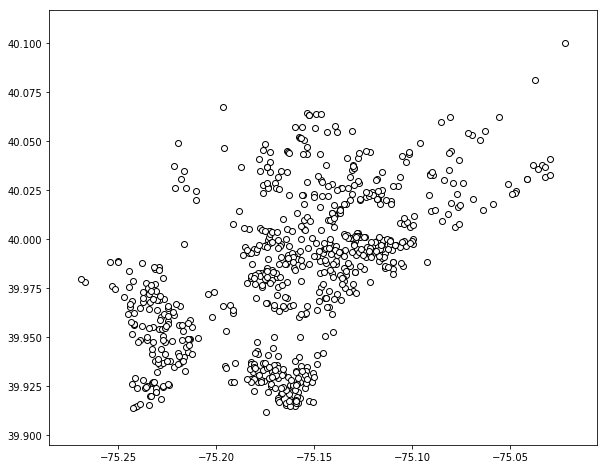

In [21]:
all_healthy_counts_df.plot(figsize=(16,8), color='white', edgecolor='black')

This is a plot of all the healthy locations on it's own. I need to plot it over the income heatmap to see the correlation between income and access to healthy foods. 

In [22]:
income_geo_df=gpd.read_file('../../data/Raw_Data/Income files/SimplyAnalytics_Shapefiles_2019-12-03_05_13_16_89807a0551dabf581fad0dc3275f5cf9.shp')
cleaned_income_df=income_geo_df[['spatial_id', 'VALUE0', 'geometry']]
cleaned_income_df.columns = ['Zipcode', 'Median Income', 'geometry']

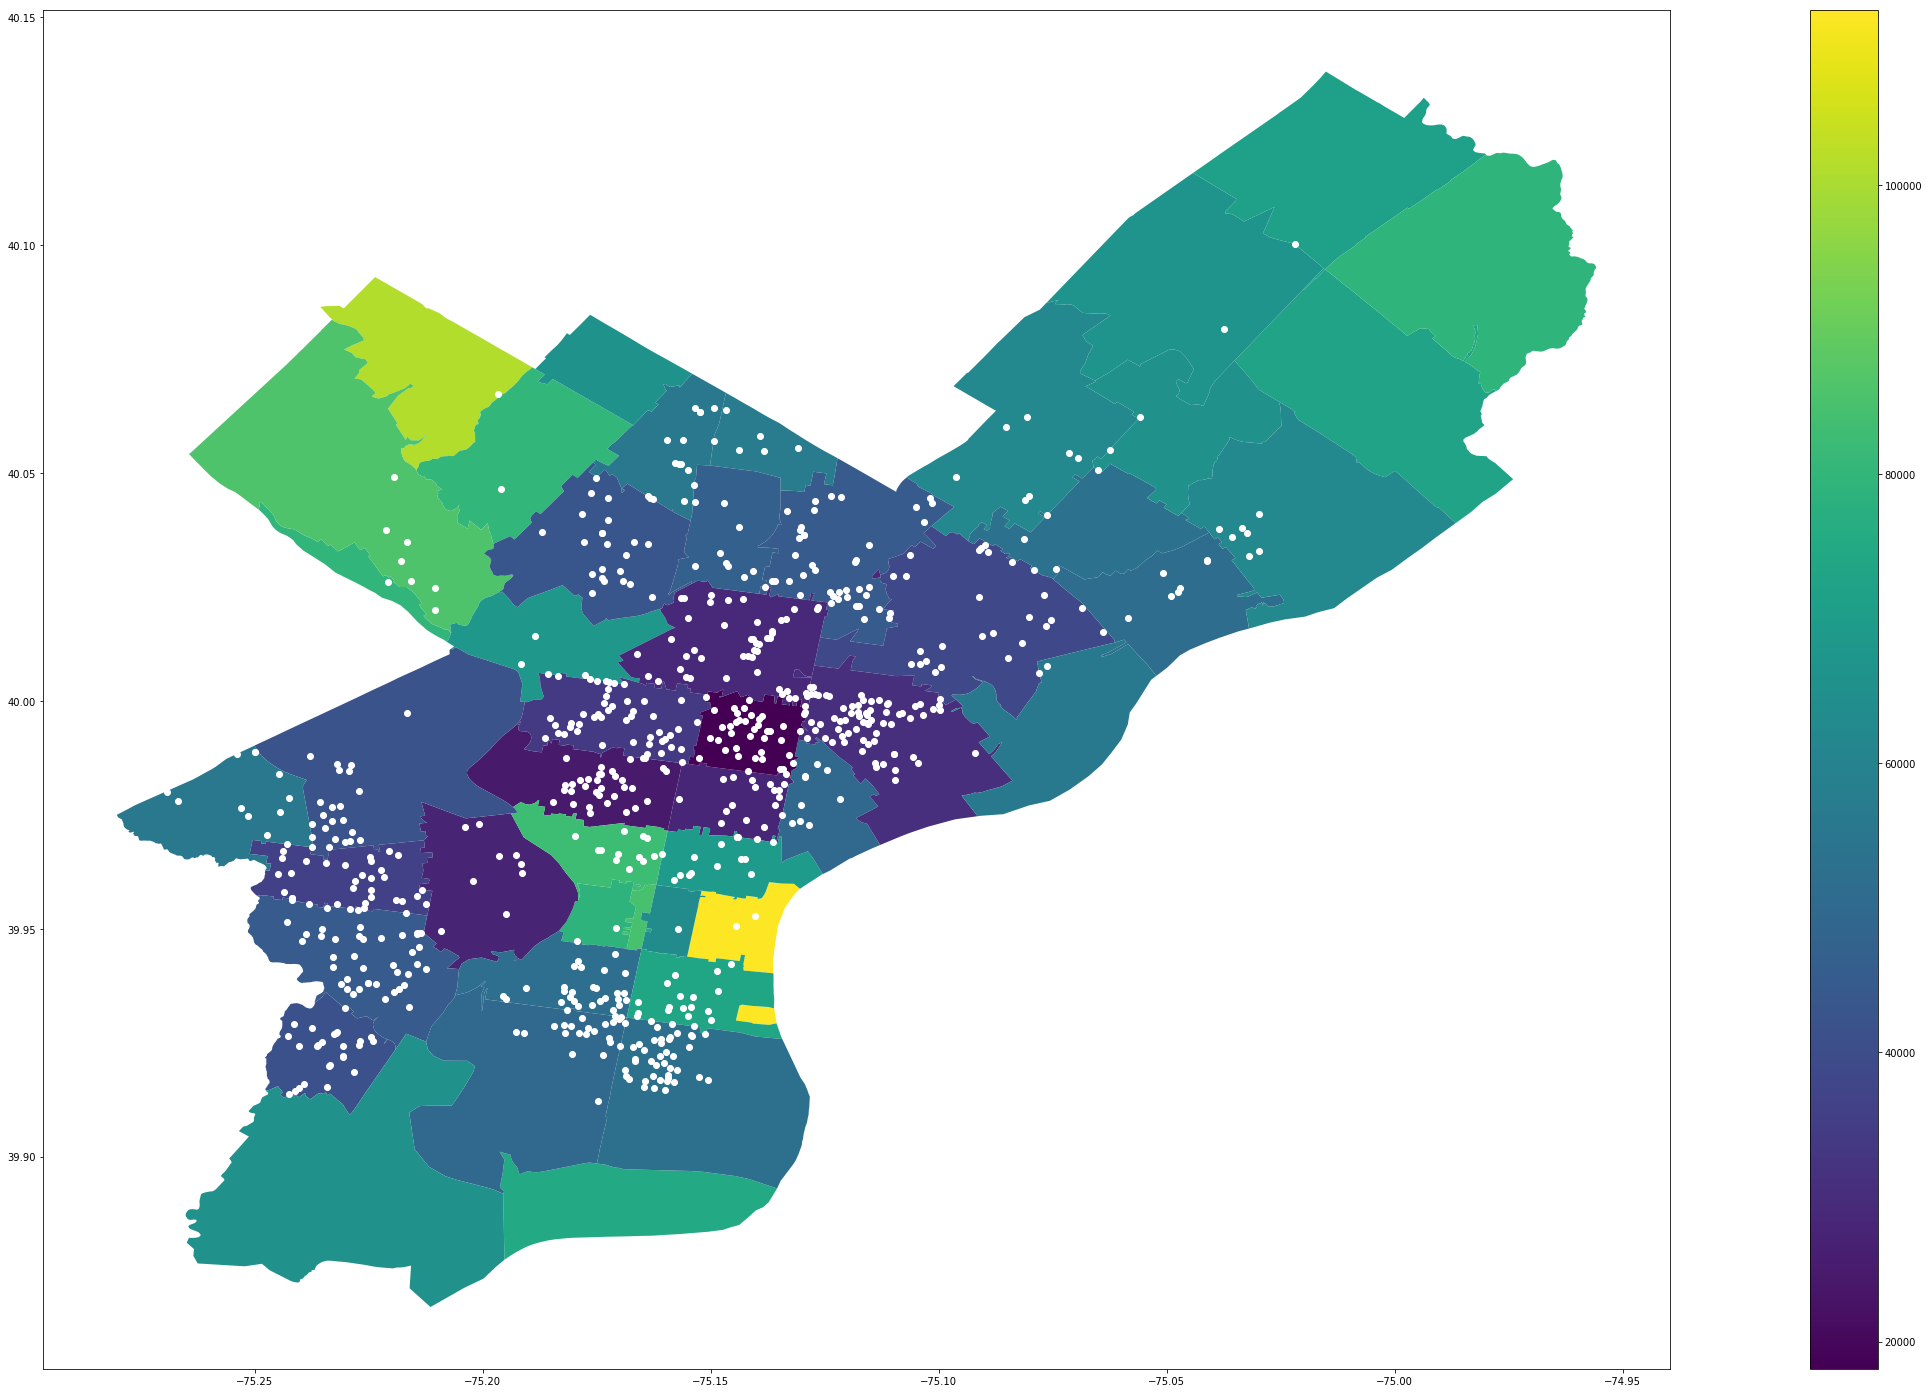

In [23]:
base=cleaned_income_df.plot(column='Median Income', legend=True, figsize=(50,25))
all_healthy_counts_df.plot(color='white', ax=base)

There are a surprising number of healthy food stores located in low income areas in Philadelphia. I was not expecting to see so many healthy store locations concentrated in lower income areas since there is a correlation between lower income areas and higher diabetes counts. However, adding the locations of convenience stores may offer more insight into this correlation between diabetes and income level. 

### Adding the Unhealthy Convenience Stores

In [24]:
convenience_stores_geo_df=gpd.read_file('/Commjhub/jupyterhub/comm318_fall2019/alidadig/COMM318_Final_Project/data/Raw_Data/Convenience_Stores.geojson')
cleaned_conveniencestores_geo_df=convenience_stores_geo_df[['Company Name', 'Street Address', 'Zip Code', 'geometry']]
cleaned_conveniencestores_geo_df.columns = ['Name', 'Address', 'Zipcode', 'geometry']

Here, I am loading in my cleaned version of the convenience store locations from my Initial_Exploration_and_Cleaning folder. 

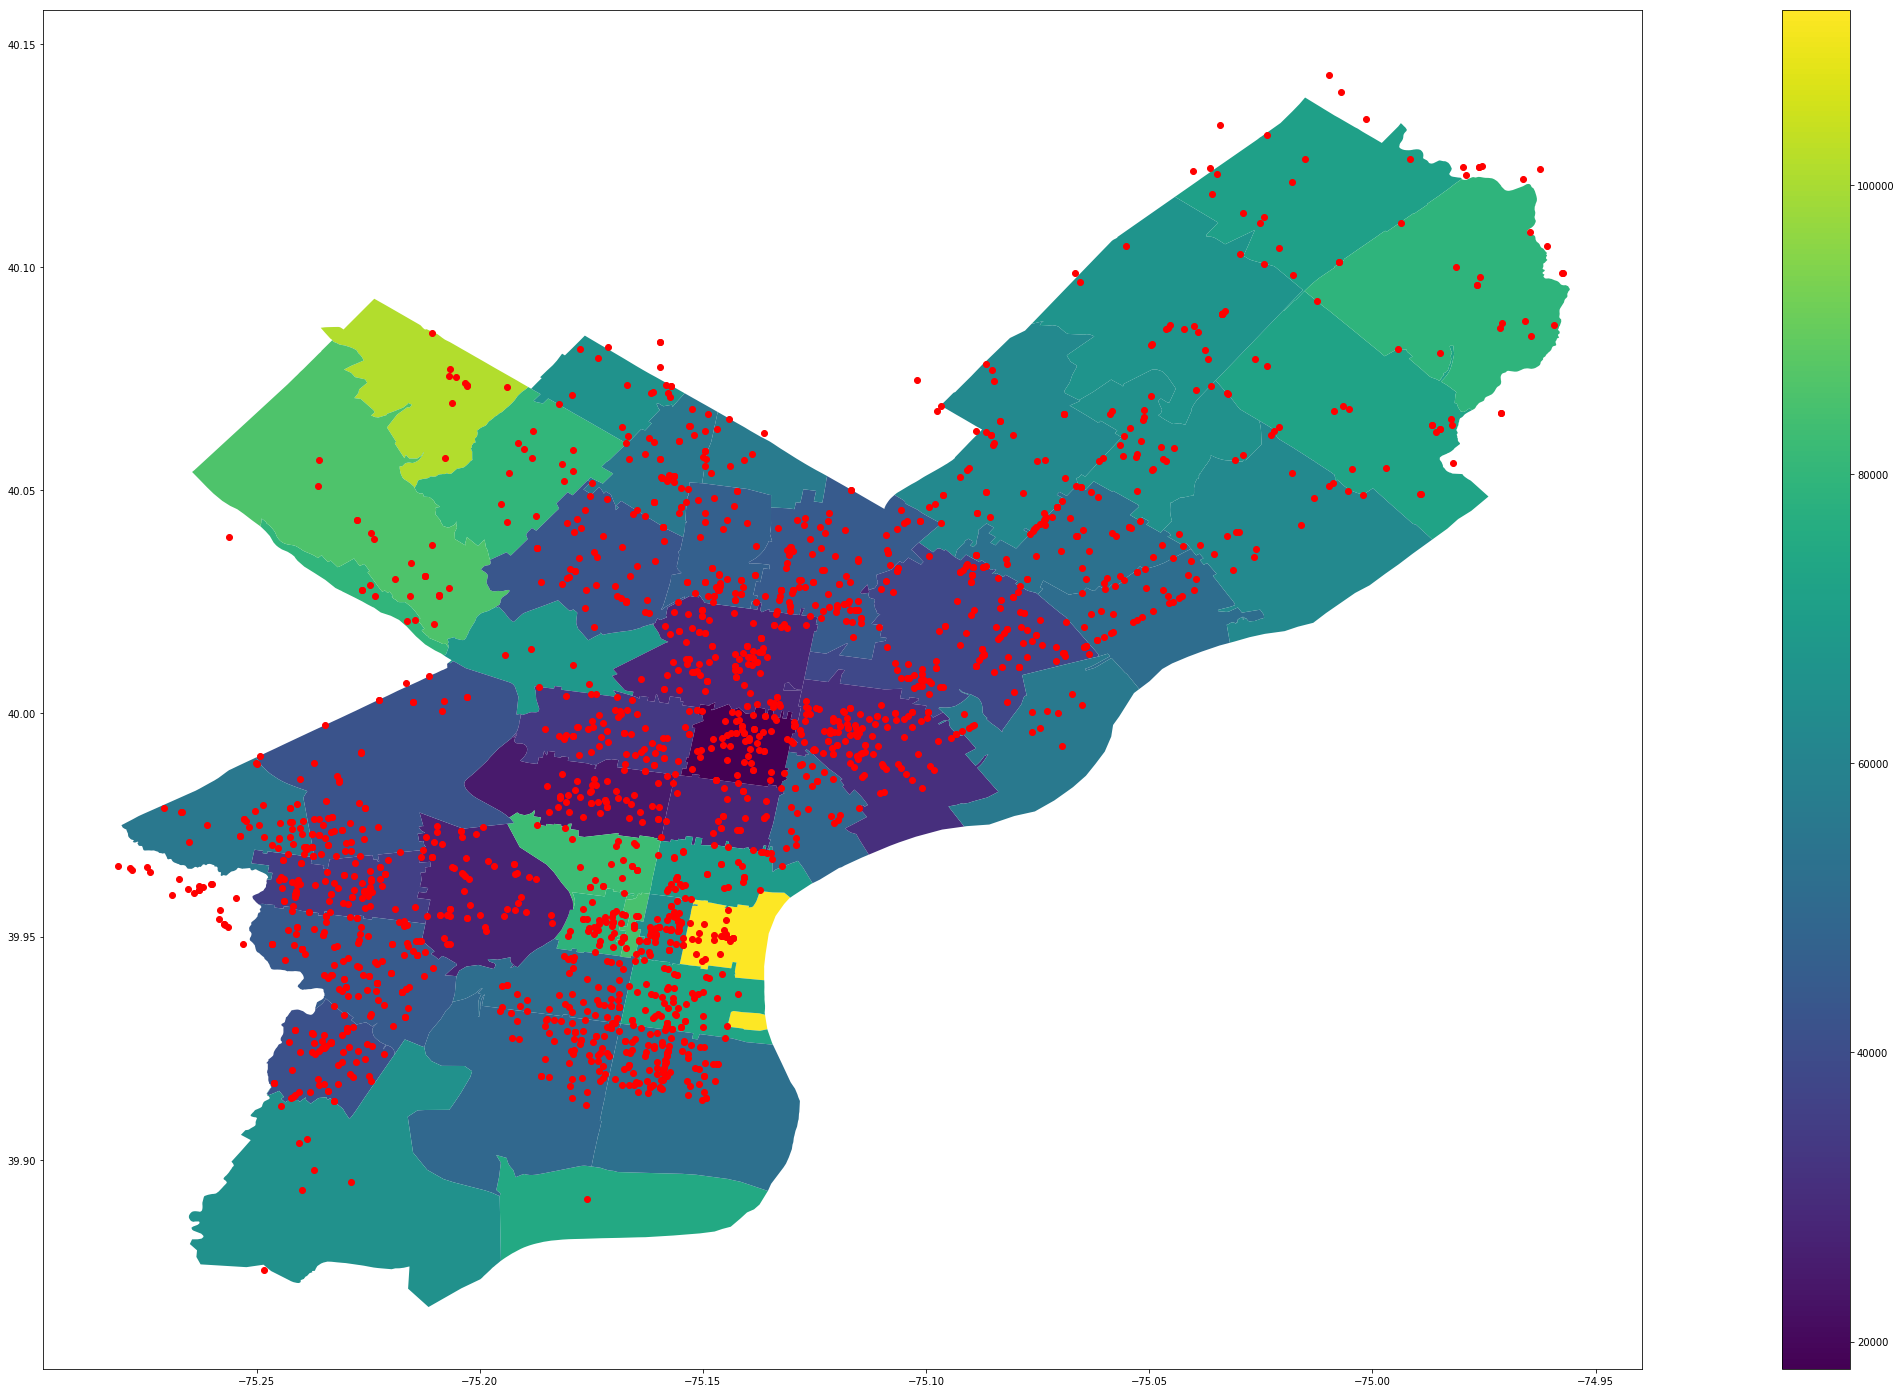

In [25]:
base=cleaned_income_df.plot(column='Median Income', legend=True, figsize=(50,25))
cleaned_conveniencestores_geo_df.plot(color='red', ax=base)

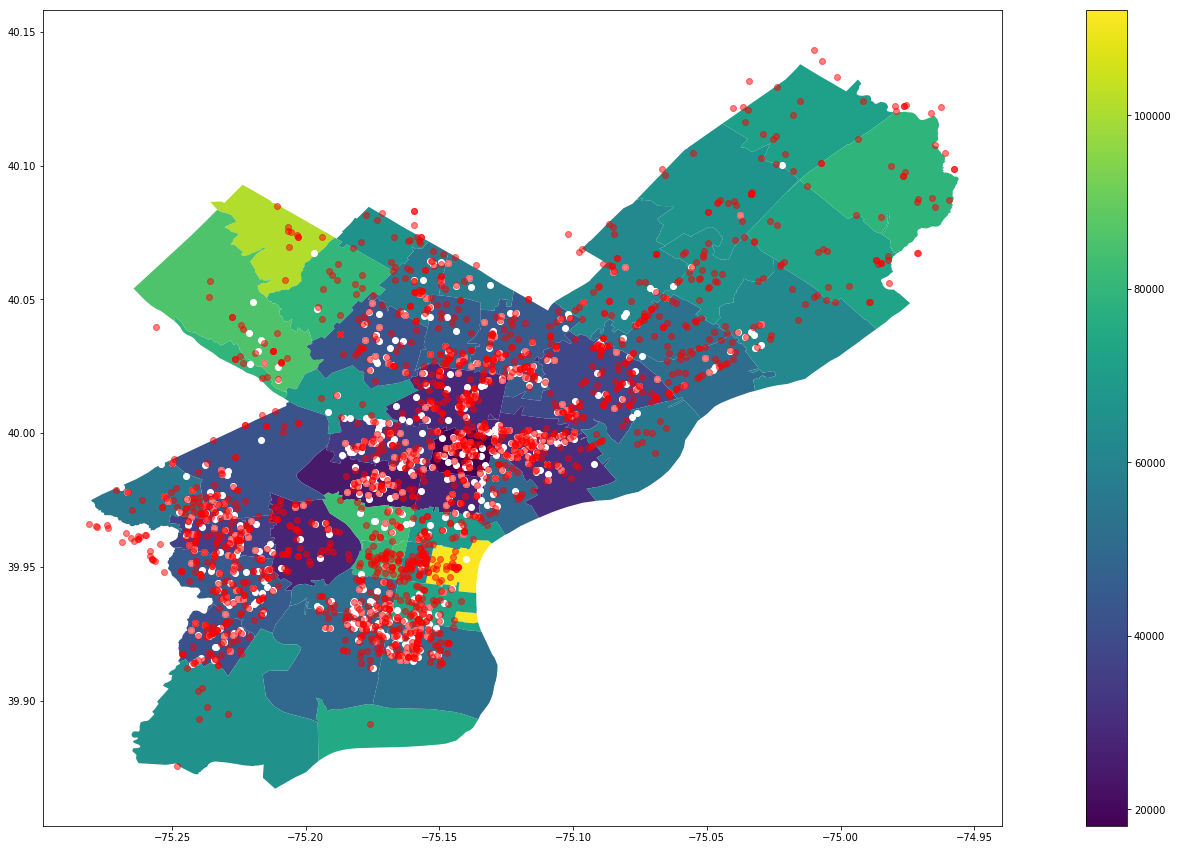

In [26]:
base=cleaned_income_df.plot(column='Median Income', legend=True, figsize=(30,15))
all_healthy_counts_df.plot(color='white', ax=base)
cleaned_conveniencestores_geo_df.plot(color='red', alpha='.5', ax=base)


I've plotted the healthy store locations in white and the unhealthy convenience store locations in red with less opacity so that the white healthy store dots are still partially visible beneath the convenience store dots. It is clear that although there are a surprisingly higher number of health stores located in lower income areas, the unhealthy store locations dominate. 

### About This Data

* This map will be used to show the dominance of unhealthy food options in Philadelphia, concentrated heavily in the low income areas. 
* Although there are a surprising number of healthy stores (cornerstores and farmers markets) in the low income areas, this map shows that the unhealthy stores dominate. 
* This could be one factor influencing the correlation between low income areas and high rates of diabetes. 
* Overall, this (combined with my other data on diabetes and income) shows that it's not enough to have high access to healthy food stores; it's also important to reduce access to unhealthy food in order to improve health.